In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df = pd.read_csv('../../dataset/tables_clean.csv')

df = df[:1000]
df['id'] = df['id']+ '-' + df['id_file']

df

,id,caption,footnotes,references,id_file,columns,n_columns,rows,n_rows,n_cells,caption_len,n_references,n_footnotes
0,S5.T1-2406.12243v1,tabl|1|instruct|tune|data|with|differ|rec|task...,[''],[''],2406.12243v1,['task|recommend|base|on|user|interest|and|rol...,1,['n|n|task|recommend|base|on|domain|focusn|ins...,3,3,65,0,0
1,S5.T2-2406.12243v1,tabl|2|statist|of|the|dataset,[''],['our|model|evalu|wa|conduct|on|divers|dataset...,2406.12243v1,"['dataset', 'languag', 'user', 'new', 'click',...",6,['mind|22|n|english|1000000|161013|24155470|ti...,3,18,29,5,0
2,S5.T3-2406.12243v1,tabl|3|overal|perform|comparison|between|the|b...,[''],['we|have|assess|the|recommend|perform|of|cher...,2406.12243v1,"['method', 'mind', 'yahoo', 'adressa']",4,['r|r|bmr|bolditalicr|2|r|r|bmr|bolditalicr|2|...,2,8,186,6,0
3,S4.T1-2406.10244v1,tabl|1|statist|inform|of|adopt|dataset,[''],['statist|inform|of|the|three|dataset|is|shown...,2406.10244v1,"['dataset', 'user', 'item', 'interact', 'avgle...",6,"['ml1m|6041|3707|1000209|16560|9553', 'beauti|...",3,18,38,24,0
4,S4.T2-2406.10244v1,tabl|2|overal|perform|comparison|between|glint...,['recommend|perform|of|glintru|and|exist|state...,"['in|thi|subsect', 'we|compar|the|perform|of|g...",2406.10244v1,"['model', 'ml1m', 'amazonbeauti', 'amazonvideo...",4,['recall10|mrr10|ndcg10|recall10|mrr10|ndcg10|...,9,36,60,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S3.T4-2408.00247v3,tabl|4|the|impact|of|hyperparamet|945|120572|a...,[''],['impact|of|hyperparamet|n|n|945n|n|120572n|n|...,2408.00247v3,"['alpha', 'pvr', 'ctcvr']",3,['m|u2062|n|u2062|r|m|u2062|a|u2062|i|u2062|n|...,5,15,136,12,0
996,S2.T1-2407.16594v1,tabl|1|comparison|between|the|propos|framework...,[''],['tabl|1|report|the|portion|of|method|present|...,2407.16594v1,"['model', 'no|train', 'realist', 'sourc|code',...",5,"['distribut|interact|topic', 'n|genrec|our', '...",7,35,588,2,0
997,S6.T1-2404.14692v1,tabl|1|dataset|statist,[''],['dataset|we|use|n|n|13n|n|13n|n|13n|13n|n|dat...,2404.14692v1,"['dataset', 'node', 'edg', 'com', 'feat']",5,"['disjoint|cora|2708|5429|7|1433', 'cites|3312...",13,65,22,15,0
998,S6.T2-2404.14692v1,tabl|2|train|time|100|epoch|on|disjoint|commun,[''],['model|train|effici|tablexa02|depict|the|lear...,2404.14692v1,"['method', 'cora', 'cites', 'pubm', 'reddit']",5,"['n|k|k|k|italick|cliqu|041|s|046|s|217|s', 'c...",6,30,46,6,0


In [68]:
#import jacard similarity from sklearn

from sklearn.metrics import jaccard_score

#use jaccard_score to calculate the similarity between two lists

#make same size of list1 and list2
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return intersection / union

In [ ]:

table_similarity = []

for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            #remove the first and last character, which are brackets
            columns_1 = row1['columns'][1:-1].split(', ')
            columns_2 = row2['columns'][1:-1].split(', ')
            similarity = jaccard_similarity(columns_1, columns_2)
            table_similarity.append([row1['id'], row2['id'], similarity, row1['id_file'], row2['id_file']])
            

#print table_similarity order by descending similarity
table_similarity = sorted(table_similarity, key=lambda x: x[2], reverse=True)

table_similarity[:20]


In [57]:

table_similarity = pd.DataFrame(table_similarity, columns=['table1', 'table2', 'similarity','id_file1','id_file2'])
table_similarity = table_similarity[table_similarity['similarity'] > 0]
table_similarity['is_same_file'] = table_similarity['id_file1'] == table_similarity['id_file2']
table_similarity = table_similarity.sort_values(by='similarity', ascending=False)

table_similarity




,table1,table2,similarity,id_file1,id_file2,is_same_file
8,S4.T4-2408.09671v1,S4.T2-2408.09671v1,1.000000,2408.09671v1,2408.09671v1,True
9,S4.T4-2408.09671v1,S4.T3-2408.09671v1,1.000000,2408.09671v1,2408.09671v1,True
5,S4.T2-2408.09671v1,S4.T4-2408.09671v1,1.000000,2408.09671v1,2408.09671v1,True
4,S4.T2-2408.09671v1,S4.T3-2408.09671v1,1.000000,2408.09671v1,2408.09671v1,True
3,S5.T3-2405.11531v2,S5.T2-2405.11531v2,1.000000,2405.11531v2,2405.11531v2,True
...,...,...,...,...,...,...
297,S4.T4-2408.09671v1,S4.T1-2408.16578v1,0.066667,2408.09671v1,2408.16578v1,False
298,S4.T1-2408.16578v1,S5.T2-2405.11531v2,0.062500,2408.16578v1,2405.11531v2,False
299,S4.T1-2408.16578v1,S5.T3-2405.11531v2,0.062500,2408.16578v1,2405.11531v2,False
300,S5.T2-2405.11531v2,S4.T1-2408.16578v1,0.062500,2405.11531v2,2408.16578v1,False


In [58]:
# split the tables into two groups, same file and different files
same_file = table_similarity[table_similarity['is_same_file'] == True]
diff_file = table_similarity[table_similarity['is_same_file'] == False]

diff_file

,table1,table2,similarity,id_file1,id_file2,is_same_file
28,S4.T1-2408.09671v1,S4.T1-2406.10244v1,0.333333,2408.09671v1,2406.10244v1,False
29,S5.T6-2405.02429v2,S6.T3-2408.09748v1,0.333333,2405.02429v2,2408.09748v1,False
26,S6.T3-2408.09748v1,S5.T6-2405.02429v2,0.333333,2408.09748v1,2405.02429v2,False
27,S6.T4-2408.09748v1,S4.T3-2406.10244v1,0.333333,2408.09748v1,2406.10244v1,False
20,S4.T1-2406.10244v1,S4.T1-2408.08564v1,0.333333,2406.10244v1,2408.08564v1,False
...,...,...,...,...,...,...
297,S4.T4-2408.09671v1,S4.T1-2408.16578v1,0.066667,2408.09671v1,2408.16578v1,False
298,S4.T1-2408.16578v1,S5.T2-2405.11531v2,0.062500,2408.16578v1,2405.11531v2,False
299,S4.T1-2408.16578v1,S5.T3-2405.11531v2,0.062500,2408.16578v1,2405.11531v2,False
300,S5.T2-2405.11531v2,S4.T1-2408.16578v1,0.062500,2405.11531v2,2408.16578v1,False


In [59]:
# print best similar tables stats
best_similar_tables = diff_file.head(10)
best_similar_tables


,table1,table2,similarity,id_file1,id_file2,is_same_file
28,S4.T1-2408.09671v1,S4.T1-2406.10244v1,0.333333,2408.09671v1,2406.10244v1,False
29,S5.T6-2405.02429v2,S6.T3-2408.09748v1,0.333333,2405.02429v2,2408.09748v1,False
26,S6.T3-2408.09748v1,S5.T6-2405.02429v2,0.333333,2408.09748v1,2405.02429v2,False
27,S6.T4-2408.09748v1,S4.T3-2406.10244v1,0.333333,2408.09748v1,2406.10244v1,False
20,S4.T1-2406.10244v1,S4.T1-2408.08564v1,0.333333,2406.10244v1,2408.08564v1,False
21,S4.T1-2406.10244v1,S6.T2-2408.09748v1,0.333333,2406.10244v1,2408.09748v1,False
24,S4.T1-2408.08564v1,S4.T1-2406.10244v1,0.333333,2408.08564v1,2406.10244v1,False
25,S6.T2-2408.09748v1,S4.T1-2406.10244v1,0.333333,2408.09748v1,2406.10244v1,False
22,S4.T1-2406.10244v1,S4.T1-2408.09671v1,0.333333,2406.10244v1,2408.09671v1,False
23,S4.T3-2406.10244v1,S6.T4-2408.09748v1,0.333333,2406.10244v1,2408.09748v1,False


In [64]:
#get the columns of the best similar tables

table1 = df[df['id'] == best_similar_tables.iloc[0]['table1']]
table2 = df[df['id'] == best_similar_tables.iloc[0]['table2']]

table1_columns = table1['columns'].values[0][1:-1].split(', ')
table2_columns = table2['columns'].values[0][1:-1].split(', ')

#print similarity between the best similar tables
print(best_similar_tables.iloc[0]['similarity'])

table1_columns, table2_columns


0.3333333333333333


(["'dtaset'", "'user'", "'item'", "'iteract'", "'seq|num'", "'sparsiti'"],
 ["'dataset'", "'user'", "'item'", "'interact'", "'avglength'", "'sparsiti'"])

FileNotFoundError: [Errno 2] No such file or directory: '/home/giorgio/PycharmProjects/IDD_HW/HW_1/scripts/dataviz/output/jaccard_similarity.png'

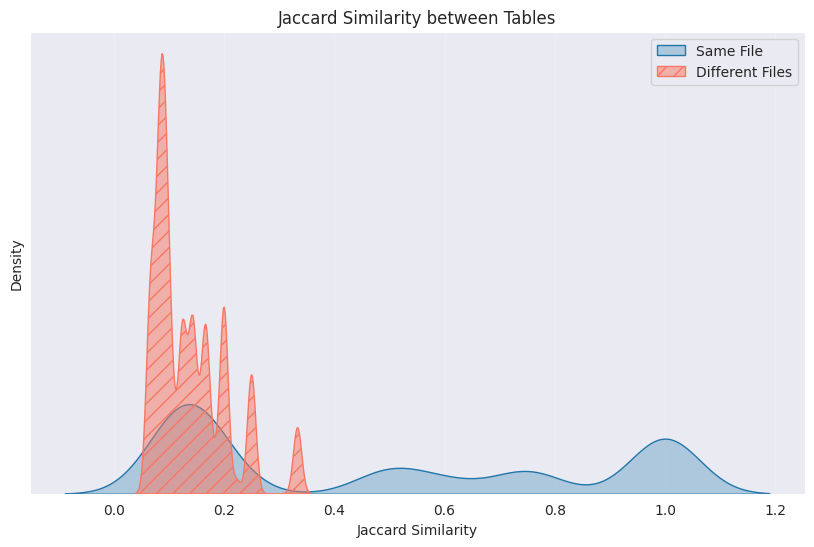

In [66]:
# plot the similarity between tables in the same file and different files
plt.figure(figsize=(10, 6))
sns.kdeplot(same_file['similarity'], color=palette[0], label='Same File', fill=True, bw_adjust=.35, alpha=0.3)
sns.kdeplot(diff_file['similarity'],  color=palette[1], label='Different Files', fill=True, bw_adjust=.35, alpha=0.5, hatch='//')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Density')
plt.yticks([])
plt.title('Jaccard Similarity between Tables')
plt.grid(alpha=0.2)
plt.legend()
plt.savefig('output/jaccard_similarity.png', dpi=300)